# The big idea

Here, I am taking some of the code that I had written in `Prototyping final variable list.ipynb` and (1) copying the minimal reproducible code over to a python script, then (2) refactoring that code into reusable and composable functions.

In [4]:
%run ../prototype_of_variability_full_criteria.py

WSERV7:
  VLMS stars in our data: 103
  VLMS Q=2 stars: 70
  VLMS Q=2 variables (ignoring periodicity): 29
  VLMS Q=2 'almost' variables: 9
  VLMS Q=2 periodic: 23
  VLMS Q=2 variables (incl. periodics): 35

BDs:                103
BDs (Q=2):          70
Periodic BDs:       29
Periodic BDs (Q=2): 23
Variable BDs (Q=2): 29
  '' - periodics  : 12
Variable BDs (Q=1): 31
  '' - v2:          2
V0 BDs (Q=0):       10
Variable BDs (Q=1+2+per): 41



NGC 1333:
all_matches   186
lowmass       105
approved      103
statistical   69
color         68
6
70 29 31 29 23 6
47 103


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
%run ../prototype2_of_variability_full_criteria.py

WSERV5:
Ref: 330 (Stat: 211)
v2: 81 (81)
v1: 86 (84)
v_per: 78 (54)
v_subj: 16 (2)
138 330
v_total: 138 (100)
Statistical variability rate: 100/211 = 0.47
Statistical periodicity rate: 54/211 = 0.26

WSERV7:
Ref: 103 (Stat: 69)
v2: 29 (29)
v1: 31 (30)
v_per: 29 (24)
v_subj: 6 (0)
47 103
v_total: 47 (36)
Statistical variability rate: 36/69 = 0.52
Statistical periodicity rate: 24/69 = 0.35

WSERV8:
Ref: 225 (Stat: 181)
v2: 37 (37)
v1: 40 (39)
v_per: 25 (22)
v_subj: 6 (2)
59 225
v_total: 59 (51)
Statistical variability rate: 51/181 = 0.28
Statistical periodicity rate: 22/181 = 0.12



In [7]:
np.sum(new_v1 & new_ref), np.sum(new_v2 & new_ref), np.sum((new_v1 | new_v2) & new_ref)

NameError: name 'new_v1' is not defined

In [ ]:
np.sum(new_v_per & new_ref)

In [ ]:

wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

n_min_dict = {wserv: n_min for (wserv, n_min) in zip(wserv_ids, n_min_list)}

In [ ]:
n_min_dict[7]

In [70]:
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT, get_SpT_from_num

In [ ]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='periodic',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not periodic",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


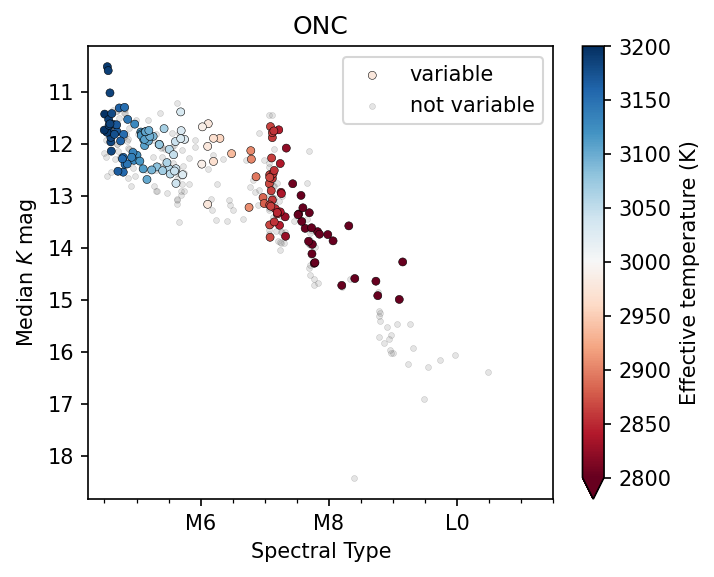

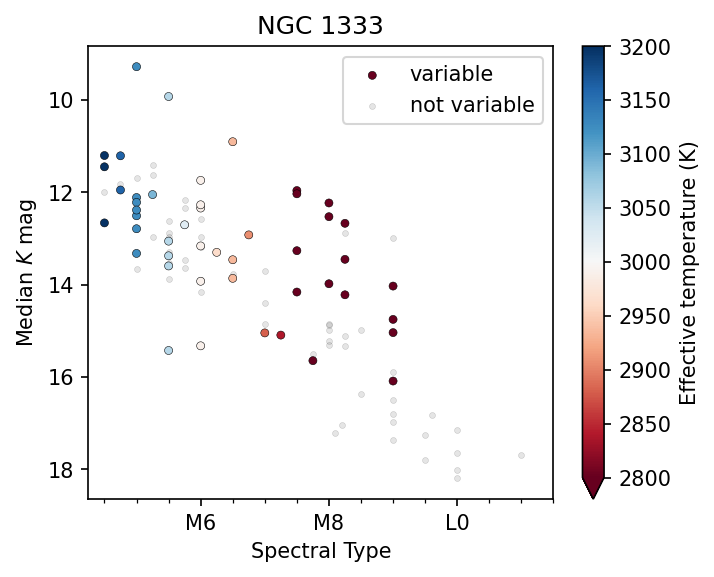

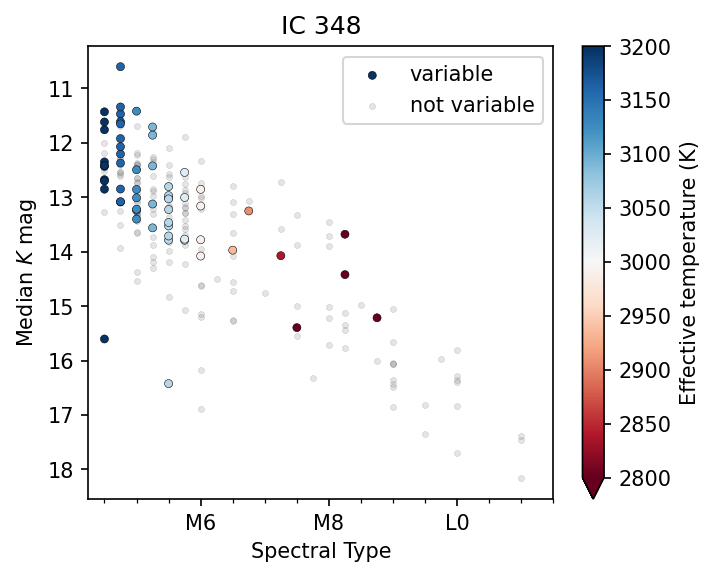

In [53]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='variable',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not variable",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


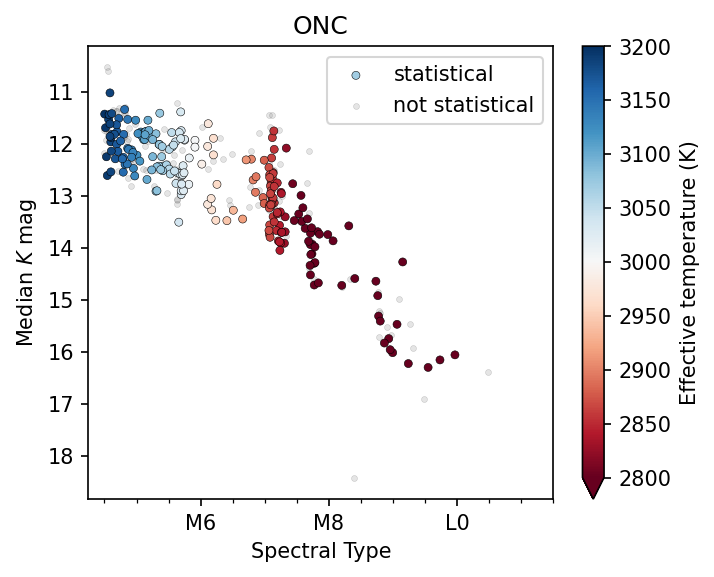

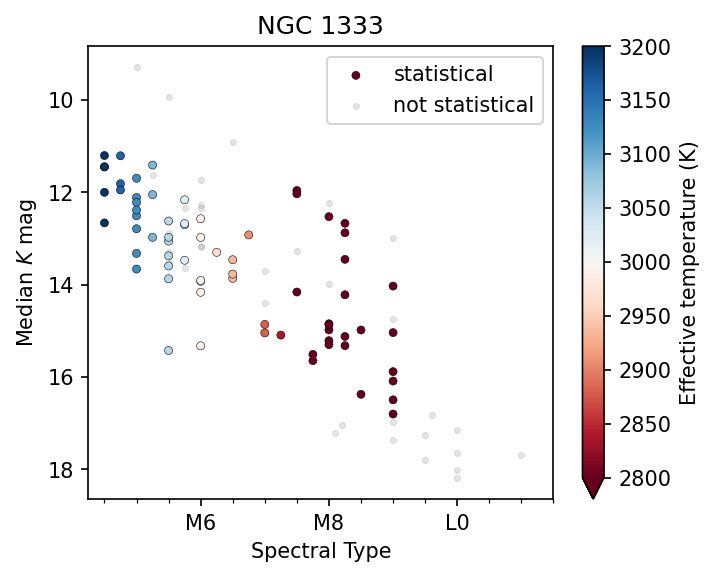

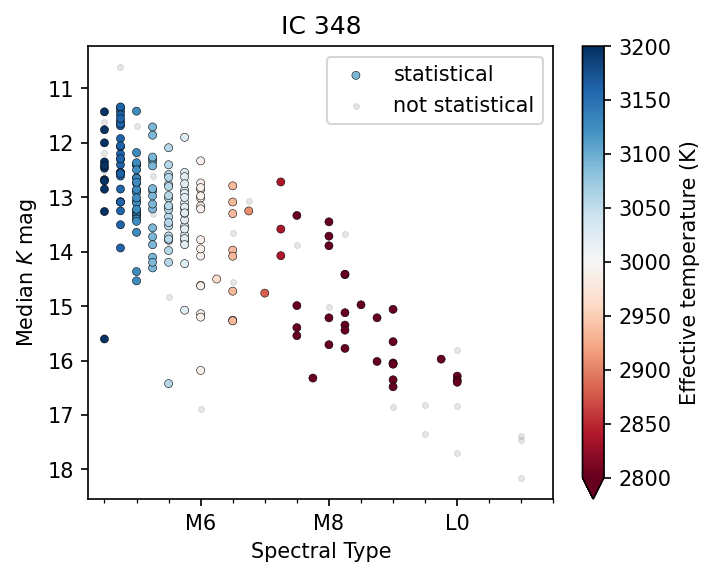

In [55]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='statistical',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not statistical",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

In [56]:
138 + 47 + 59

244

In [57]:
225 + 103 + 330

658

In [61]:
len(onc_match.lowmass) + len(ngc_match.lowmass) + len(ic_match.lowmass)

733

In [62]:
# I'm trying a sketch I made. It drops the colormapping in favor of another approach.

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


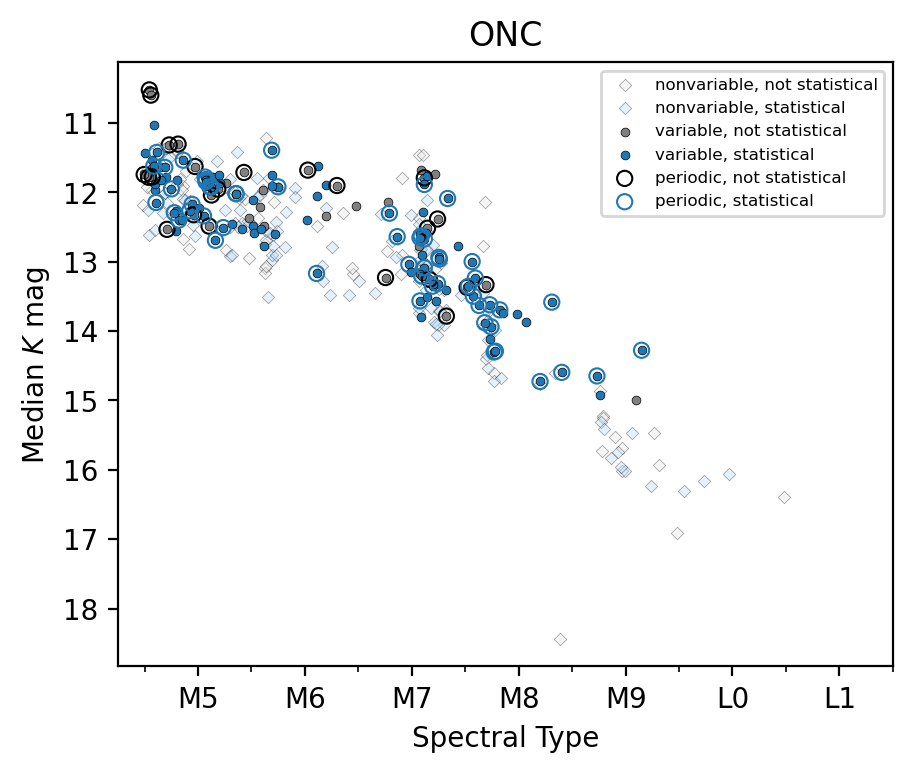

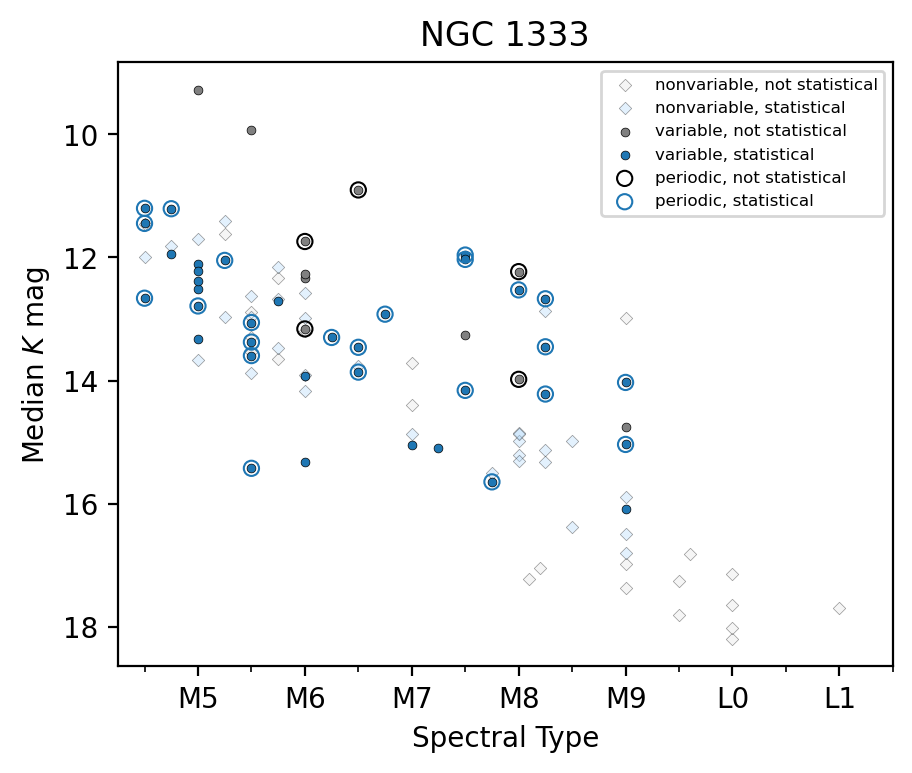

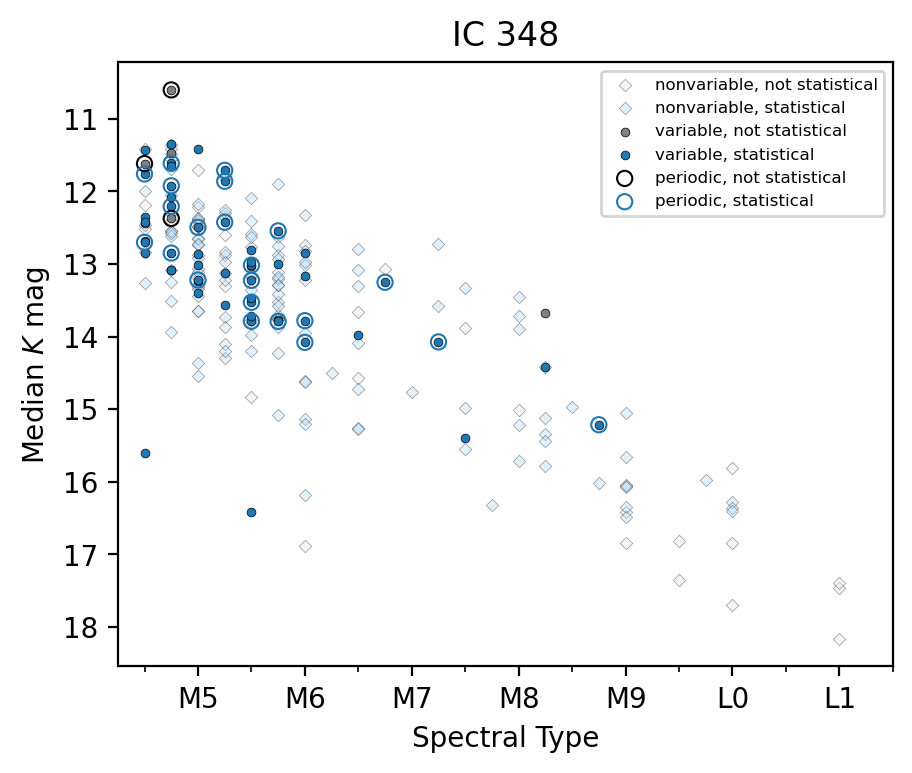

In [100]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['median_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['median_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['median_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['median_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['median_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['median_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
    ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
    plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


# March 24

Tom wants to work on some of the following ideas or issues:

1. Variability fraction (binned) as as function of spectral type

2. Variability amplitude vs SpT (all, periodic, non-periodic)

3. Color vs SpT (H-K)

4. HR diagram color-coded by
(a) amplitude
(b) rotation period

5. Sensitivity plots as a function of magnitude

6. Baraffe 2015 isochrones.

In [1]:
# Can we load up some info from the 



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 5.5
In this bin :  116
In this bin & stat :  72
In this bin & stat & variable :  38
Variability fraction in this bin :  0.5277777777777778 ± 0.11785113019775793

5.5 6.5
In this bin :  60
In this bin & stat :  41
In this bin & stat & variable :  15
Variability fraction in this bin :  0.36585365853658536 ± 0.15617376188860607

6.5 7.5
In this bin :  93
In this bin & stat :  61
In this bin & stat & variable :  28
Variability fraction in this bin :  0.45901639344262296 ± 0.12803687993289598

7.5 8.5
In this bin :  40
In this bin & stat :  27
In this bin & stat & variable :  18
Variability fraction in this bin :  0.6666666666666666 ± 0.19245008972987526

8.5 10.01
In this bin :  25
In this bin & stat :  14
In this bin & stat & variable :  3
Variability fraction in this bin :  0.21428571428571427 ± 0.2672612419124244



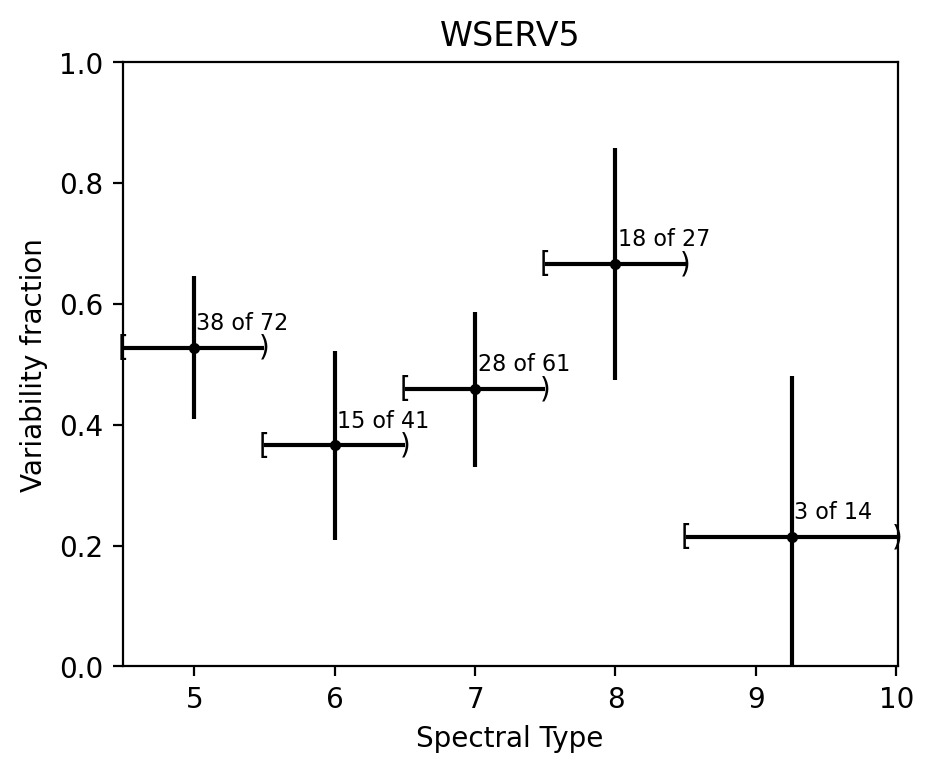

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 5.5
In this bin :  21
In this bin & stat :  19
In this bin & stat & variable :  12
Variability fraction in this bin :  0.631578947368421 ± 0.22941573387056174

5.5 6.5
In this bin :  29
In this bin & stat :  18
In this bin & stat & variable :  8
Variability fraction in this bin :  0.4444444444444444 ± 0.23570226039551587

6.5 7.5
In this bin :  10
In this bin & stat :  7
In this bin & stat & variable :  5
Variability fraction in this bin :  0.7142857142857143 ± 0.3779644730092272

7.5 8.5
In this bin :  22
In this bin & stat :  17
In this bin & stat & variable :  8
Variability fraction in this bin :  0.47058823529411764 ± 0.24253562503633297

8.5 10.01
In this bin :  19
In this bin & stat :  8
In this bin & stat & variable :  3
Variability fraction in this bin :  0.375 ± 0.35355339059327373



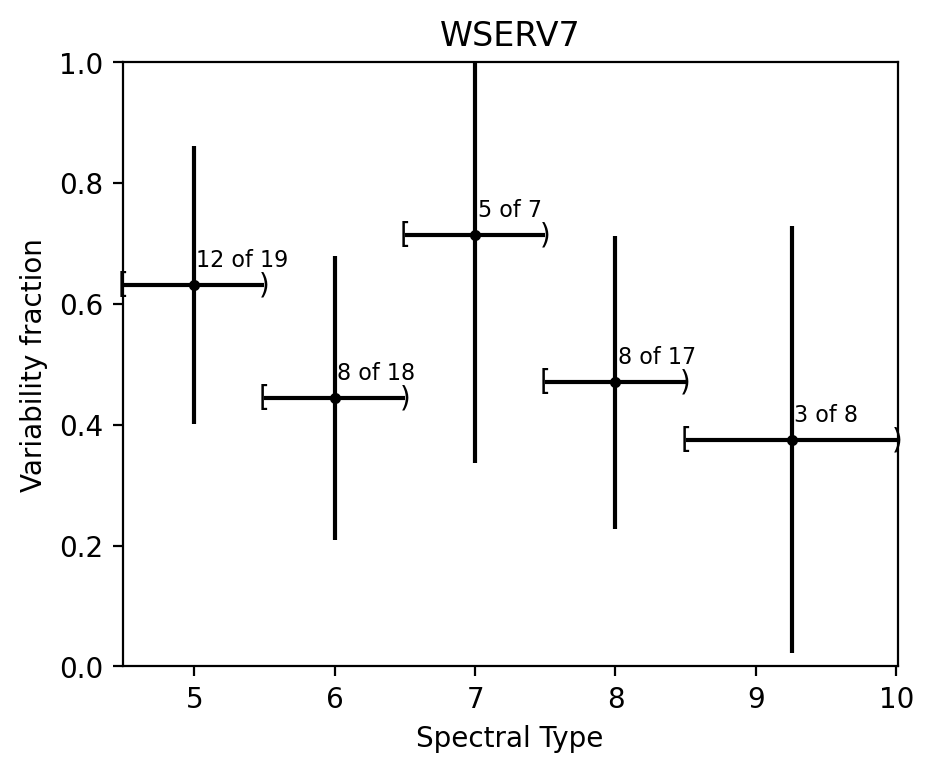

WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225

4.49 5.5
In this bin :  101
In this bin & stat :  80
In this bin & stat & variable :  29
Variability fraction in this bin :  0.3625 ± 0.11180339887498948

5.5 6.5
In this bin :  65
In this bin & stat :  58
In this bin & stat & variable :  16
Variability fraction in this bin :  0.27586206896551724 ± 0.13130643285972254

6.5 7.5
In this bin :  16
In this bin & stat :  13
In this bin & stat & variable :  3
Variability fraction in this bin :  0.23076923076923078 ± 0.2773500981126146

7.5 8.5
In this bin :  19
In this bin & stat :  16
In this bin & stat & variable :  2
Variability fraction in this bin :  0.125 ± 0.25

8.5 10.01
In this bin :  21
In this bin & stat :  14
In this bin & stat & variable :  1
Variability fraction in this bin :  0.07142857142857142 ± 0.2672612419124244



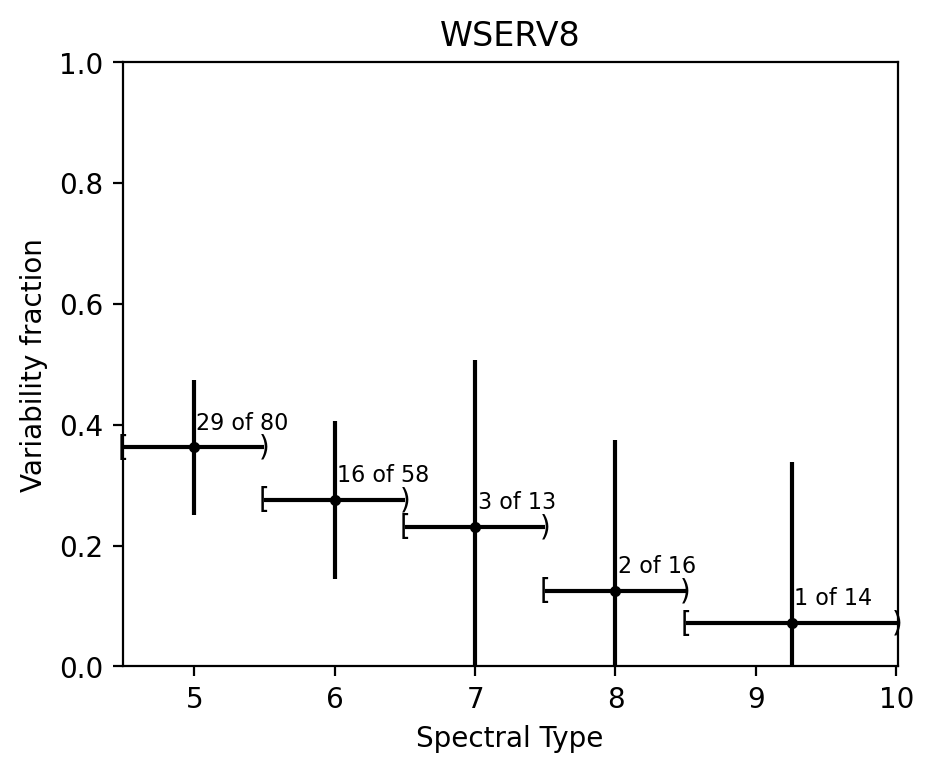

In [77]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 5.5, 6.5, 7.5, 8.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    
    fig = plt.figure(figsize=(5,4), dpi=200)    
    ax = fig.add_subplot(111)

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
#        errorbar_size = 1 / np.sqrt(bin_stat)
# see: https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_approximation_interval
        z = 1.96
        p = stat_var_fraction
        n = bin_stat
        errorbar_size = z * np.sqrt(p * (1-p) / n)
        
        print("Variability fraction in this bin : ", stat_var_fraction, "±", errorbar_size)
        
        print("")
        
        ax.errorbar([(left+right)/2], [stat_var_fraction], fmt='k.', yerr=errorbar_size)
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color='k')
        
        ax.text((left+right)/2 + 0.02, stat_var_fraction + 0.03, f"{bin_var_stat} of {bin_stat}", fontsize=8)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict)
        ax.text(right, stat_var_fraction, ")", center_dict)
        
    plt.xlim(bin_edges[0], bin_edges[-1])
    plt.ylim(0, 1)
    plt.title("WSERV" + str(wserv))
    plt.xlabel("Spectral Type")
    plt.ylabel("Variability fraction")
    plt.show()
    
    
#     fig = plt.figure(figsize=(5,4), dpi=200)

    
#     ax.scatter(
#         x_match.approved['SpT'][nonvar], 
#         x_match.approved['median_KAPERMAG3'][nonvar], 
#         marker='D',
#         s=10, 
#         linewidths=0.25,
#         c='0.9',
#         ec='k',
#         label='nonvariable, not statistical',
#         alpha=0.4,
#     )
#     ax.scatter(
#         x_match.approved['SpT'][nonvar_stat], 
#         x_match.approved['median_KAPERMAG3'][nonvar_stat], 
#         marker='D',
#         s=10, 
#         linewidths=0.25,
#         c='#bbdefb',
#         ec='k',
#         label='nonvariable, statistical',
#         alpha=0.4,
#     )
#     ax.scatter(
#         x_match.approved['SpT'][var], 
#         x_match.approved['median_KAPERMAG3'][var], 
#         s=10, 
#         linewidths=0.25,
#         c='0.5',
#         ec='k',
#         label='variable, not statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][var_stat], 
#         x_match.approved['median_KAPERMAG3'][var_stat], 

#         s=10, 
#         linewidths=0.25,
#         c='C0',
#         ec='k',
#         label='variable, statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per], 
#         x_match.approved['median_KAPERMAG3'][per], 
#         s=30, 
#         linewidths=0.75,
#         facecolor='None',
#         ec='k',
#         label='periodic, not statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per_stat], 
#         x_match.approved['median_KAPERMAG3'][per_stat], 
#         s=30, 
#         linewidths=0.75,
#         facecolor='None',
#         ec='C0',
#         label='periodic, statistical'
#     )
    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
#     ax.set_ylabel("Median $K$ mag")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
#     ax.set_title(full_names[wserv])
#     plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [28]:
plt.axhline

<function matplotlib.pyplot.axhline(y=0, xmin=0, xmax=1, **kwargs)>

WSERV5:
138 330

4.49 6.0
In this bin :  157
In this bin & stat :  102
In this bin & stat & variable :  48
Variability fraction in this bin :  0.47058823529411764

6.0 7.5
In this bin :  112
In this bin & stat :  72
In this bin & stat & variable :  33
Variability fraction in this bin :  0.4583333333333333

7.5 10.01
In this bin :  65
In this bin & stat :  41
In this bin & stat & variable :  21
Variability fraction in this bin :  0.5121951219512195



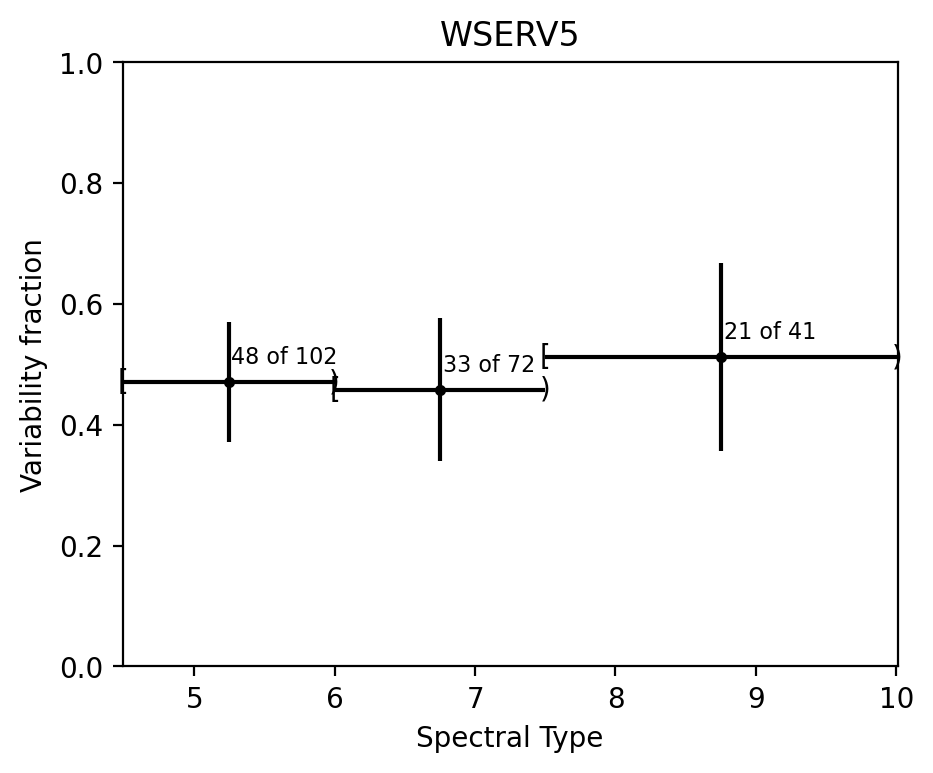

WSERV7:
47 103

4.49 6.0
In this bin :  38
In this bin & stat :  30
In this bin & stat & variable :  17
Variability fraction in this bin :  0.5666666666666667

6.0 7.5
In this bin :  22
In this bin & stat :  14
In this bin & stat & variable :  8
Variability fraction in this bin :  0.5714285714285714

7.5 10.01
In this bin :  41
In this bin & stat :  25
In this bin & stat & variable :  11
Variability fraction in this bin :  0.44



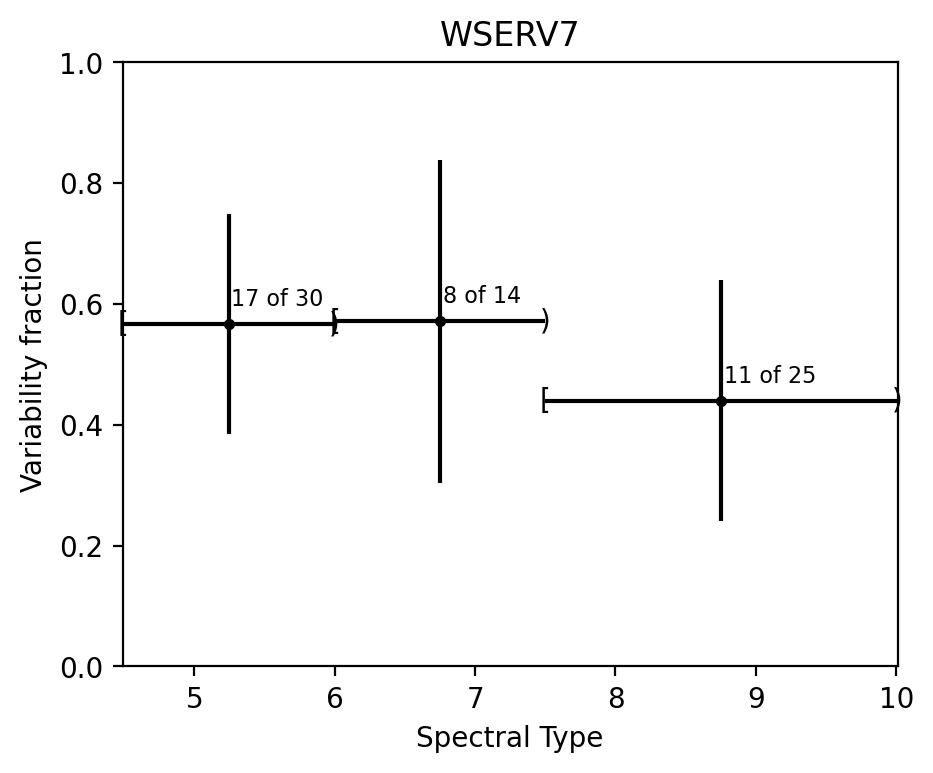

WSERV8:
59 225

4.49 6.0
In this bin :  148
In this bin & stat :  121
In this bin & stat & variable :  41
Variability fraction in this bin :  0.33884297520661155

6.0 7.5
In this bin :  34
In this bin & stat :  30
In this bin & stat & variable :  7
Variability fraction in this bin :  0.23333333333333334

7.5 10.01
In this bin :  40
In this bin & stat :  30
In this bin & stat & variable :  3
Variability fraction in this bin :  0.1



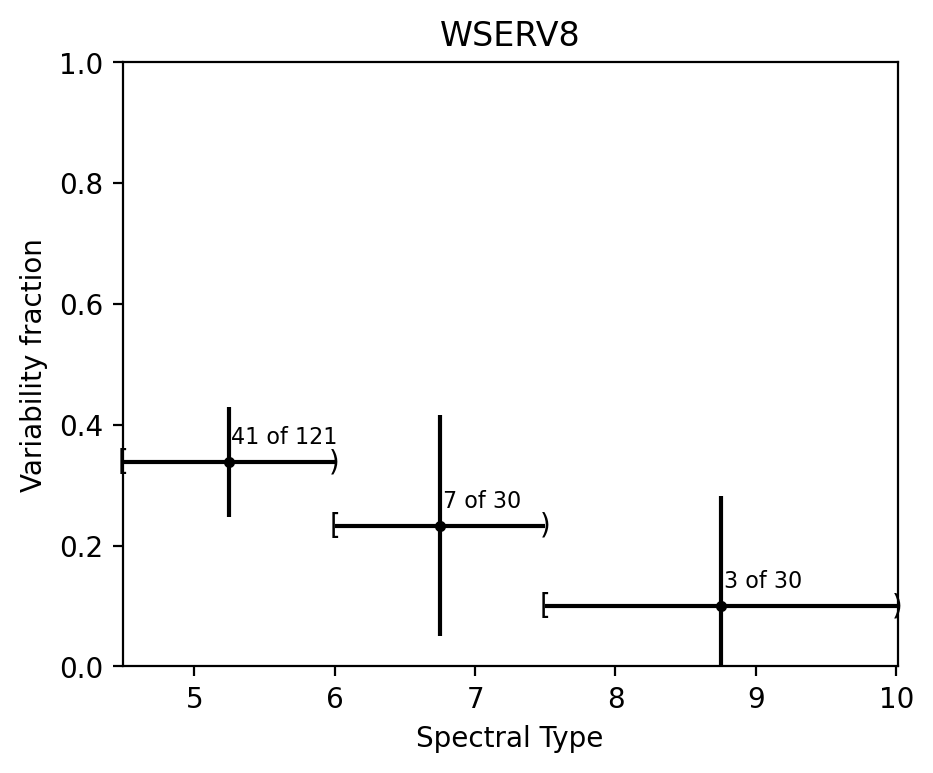

In [41]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 6., 7.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    
    fig = plt.figure(figsize=(5,4), dpi=200)    
    ax = fig.add_subplot(111)

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
        errorbar_size = 1 / np.sqrt(bin_stat)
        print("Variability fraction in this bin : ", stat_var_fraction)
        
        print("")
        
        ax.errorbar([(left+right)/2], [stat_var_fraction], fmt='k.', yerr=errorbar_size)
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color='k')
        
        ax.text((left+right)/2 + 0.02, stat_var_fraction + 0.03, f"{bin_var_stat} of {bin_stat}", fontsize=8)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict)
        ax.text(right, stat_var_fraction, ")", center_dict)
        
    plt.xlim(bin_edges[0], bin_edges[-1])
    plt.ylim(0, 1)
    plt.title("WSERV" + str(wserv))
    plt.xlabel("Spectral Type")
    plt.ylabel("Variability fraction")
    plt.show()

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 5.5
In this bin :  116
In this bin & stat :  72
In this bin & stat & variable :  38
Variability fraction in this bin :  0.5277777777777778

5.5 6.5
In this bin :  60
In this bin & stat :  41
In this bin & stat & variable :  15
Variability fraction in this bin :  0.36585365853658536

6.5 7.5
In this bin :  93
In this bin & stat :  61
In this bin & stat & variable :  28
Variability fraction in this bin :  0.45901639344262296

7.5 8.5
In this bin :  40
In this bin & stat :  27
In this bin & stat & variable :  18
Variability fraction in this bin :  0.6666666666666666

8.5 10.01
In this bin :  25
In this bin & stat :  14
In this bin & stat & variable :  3
Variability fraction in this bin :  0.21428571428571427

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 5.5
In this bin :  21
In this bin & stat :  19
In this bin & stat & variable :  12
Variability fraction in this bin :  0.631578947368421

5.5 6.5
In this 

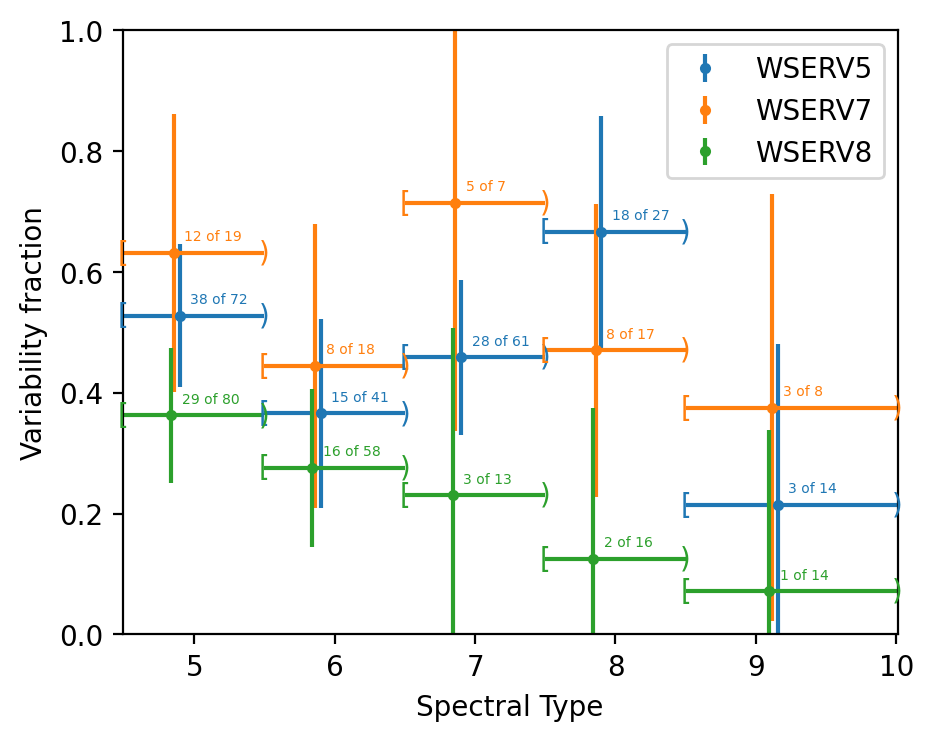

In [53]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
fig = plt.figure(figsize=(5,4), dpi=200)    
ax = fig.add_subplot(111)

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 5.5, 6.5, 7.5, 8.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
        errorbar_size = 1 / np.sqrt(bin_stat)
        print("Variability fraction in this bin : ", stat_var_fraction)
        
        print("")
        
        x_offset = - wserv/50
        
        ax.errorbar([(left+right)/2 + x_offset], [stat_var_fraction], fmt='.', yerr=errorbar_size, color=color_dict[wserv], label=f"WSERV{wserv}" if left==left_edges[0] else "")
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color=color_dict[wserv])
        
        ax.text((left+right)/2 + 0.075 + x_offset, stat_var_fraction + 0.02, f"{bin_var_stat} of {bin_stat}", fontsize=5, color=color_dict[wserv], zorder=100)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict , color=color_dict[wserv])
        ax.text(right, stat_var_fraction, ")", center_dict, color=color_dict[wserv])
        
plt.xlim(bin_edges[0], bin_edges[-1])
plt.ylim(0, 1)
plt.legend()
# plt.title("WSERV" + str(wserv))
plt.xlabel("Spectral Type")
plt.ylabel("Variability fraction")
plt.show()
    
    



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 6
In this bin :  157
In this bin & stat :  102
In this bin & stat & variable :  48
Variability fraction in this bin :  0.47058823529411764 ± 0.09686643404805527

6 7.5
In this bin :  112
In this bin & stat :  72
In this bin & stat & variable :  33
Variability fraction in this bin :  0.4583333333333333 ± 0.11509238774154172

7.5 10.01
In this bin :  65
In this bin & stat :  41
In this bin & stat & variable :  21
Variability fraction in this bin :  0.5121951219512195 ± 0.15300475629532673

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 6
In this bin :  38
In this bin & stat :  30
In this bin & stat & variable :  17
Variability fraction in this bin :  0.5666666666666667 ± 0.17732514600982965

6 7.5
In this bin :  22
In this bin & stat :  14
In this bin & stat & variable :  8
Variability fraction in this bin :  0.5714285714285714 ± 0.25922962793631443

7.5 10.01
In this bin :  41
In this bin & stat :  25
In 

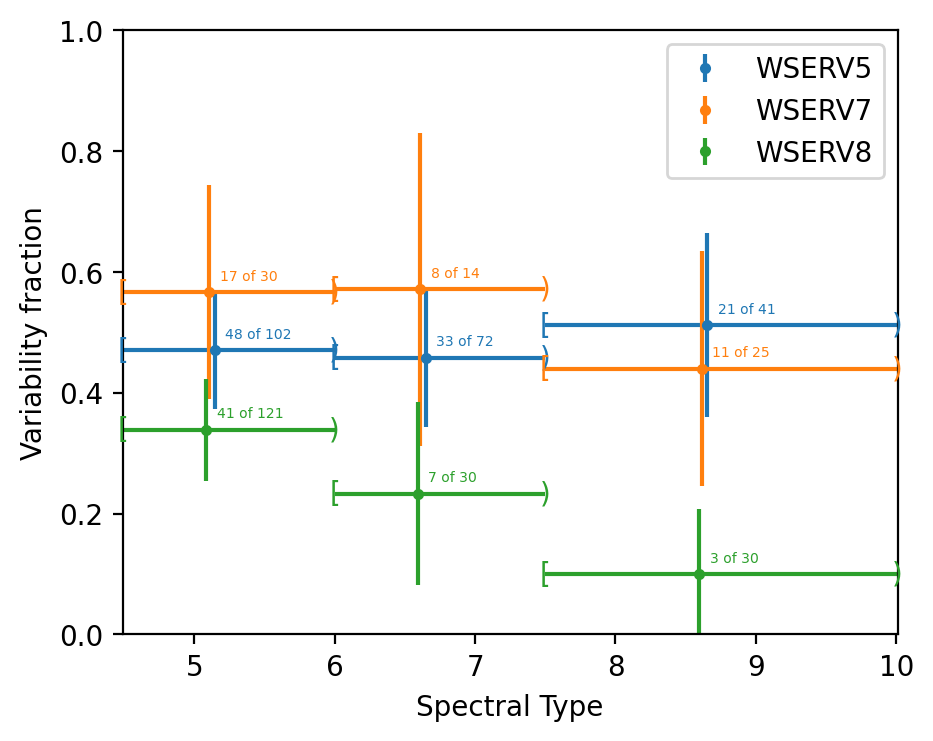

In [78]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
fig = plt.figure(figsize=(5,4), dpi=200)    
ax = fig.add_subplot(111)

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 6, 7.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
#         errorbar_size = 1 / np.sqrt(bin_stat)
        z = 1.96
        p = stat_var_fraction
        n = bin_stat
        errorbar_size = z * np.sqrt(p * (1-p) / n)
        
        print("Variability fraction in this bin : ", stat_var_fraction, "±", errorbar_size)
        
        print("")
        
        x_offset = - wserv/50
        
        ax.errorbar([(left+right)/2 + x_offset], [stat_var_fraction], fmt='.', yerr=errorbar_size, color=color_dict[wserv], label=f"WSERV{wserv}" if left==left_edges[0] else "")
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color=color_dict[wserv])
        
        ax.text((left+right)/2 + 0.075 + x_offset, stat_var_fraction + 0.02, f"{bin_var_stat} of {bin_stat}", fontsize=5, color=color_dict[wserv], zorder=100)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict , color=color_dict[wserv])
        ax.text(right, stat_var_fraction, ")", center_dict, color=color_dict[wserv])
        
plt.xlim(bin_edges[0], bin_edges[-1])
plt.ylim(0, 1)
plt.legend()
# plt.title("WSERV" + str(wserv))
plt.xlabel("Spectral Type")
plt.ylabel("Variability fraction")
plt.show()
    
    



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 6
In this bin :  157
In this bin & stat :  102
In this bin & stat & periodic :  22
Periodic fraction in this bin :  0.21568627450980393 ± 0.07982007795972658

6 7.5
In this bin :  112
In this bin & stat :  72
In this bin & stat & periodic :  16
Periodic fraction in this bin :  0.2222222222222222 ± 0.09603097351271477

7.5 10.01
In this bin :  65
In this bin & stat :  41
In this bin & stat & periodic :  16
Periodic fraction in this bin :  0.3902439024390244 ± 0.1493173528300819

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 6
In this bin :  38
In this bin & stat :  30
In this bin & stat & periodic :  10
Periodic fraction in this bin :  0.3333333333333333 ± 0.1686899413014786

6 7.5
In this bin :  22
In this bin & stat :  14
In this bin & stat & periodic :  4
Periodic fraction in this bin :  0.2857142857142857 ± 0.23664319132398465

7.5 10.01
In this bin :  41
In this bin & stat :  25
In this bin & stat &

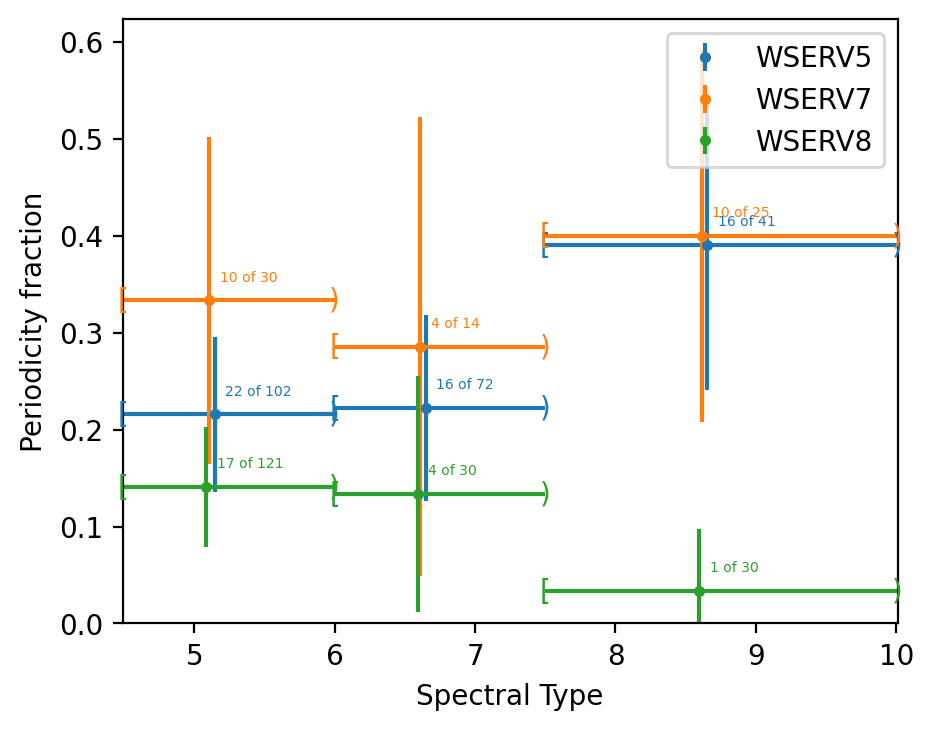

In [79]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
fig = plt.figure(figsize=(5,4), dpi=200)    
ax = fig.add_subplot(111)

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 6, 7.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_per_stat = np.sum(in_this_bin & per_stat)
        print("In this bin & stat & periodic : ", bin_per_stat)
        stat_per_fraction = bin_per_stat / bin_stat
#         errorbar_size = 1 / np.sqrt(bin_stat)
        z = 1.96
        p = stat_per_fraction
        n = bin_stat
        errorbar_size = z * np.sqrt(p * (1-p) / n)
        
        print("Periodic fraction in this bin : ", stat_per_fraction, "±", errorbar_size)        
#         print("Periodic fraction in this bin : ", stat_per_fraction)
        
        print("")
        
        x_offset = - wserv/50
        
        ax.errorbar([(left+right)/2 + x_offset], [stat_per_fraction], fmt='.', yerr=errorbar_size, color=color_dict[wserv], label=f"WSERV{wserv}" if left==left_edges[0] else "")
        ax.hlines(y=stat_per_fraction, xmin=left, xmax=right, color=color_dict[wserv])
        
        ax.text((left+right)/2 + 0.075 + x_offset, stat_per_fraction + 0.02, f"{bin_per_stat} of {bin_stat}", fontsize=5, color=color_dict[wserv], zorder=100, ) 
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_per_fraction, "[", center_dict , color=color_dict[wserv])
        ax.text(right, stat_per_fraction, ")", center_dict, color=color_dict[wserv])
        
plt.xlim(bin_edges[0], bin_edges[-1])
plt.ylim(0, None)
plt.legend()
# plt.title("WSERV" + str(wserv))
plt.xlabel("Spectral Type")
plt.ylabel("Periodicity fraction")
plt.show()
    
    



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


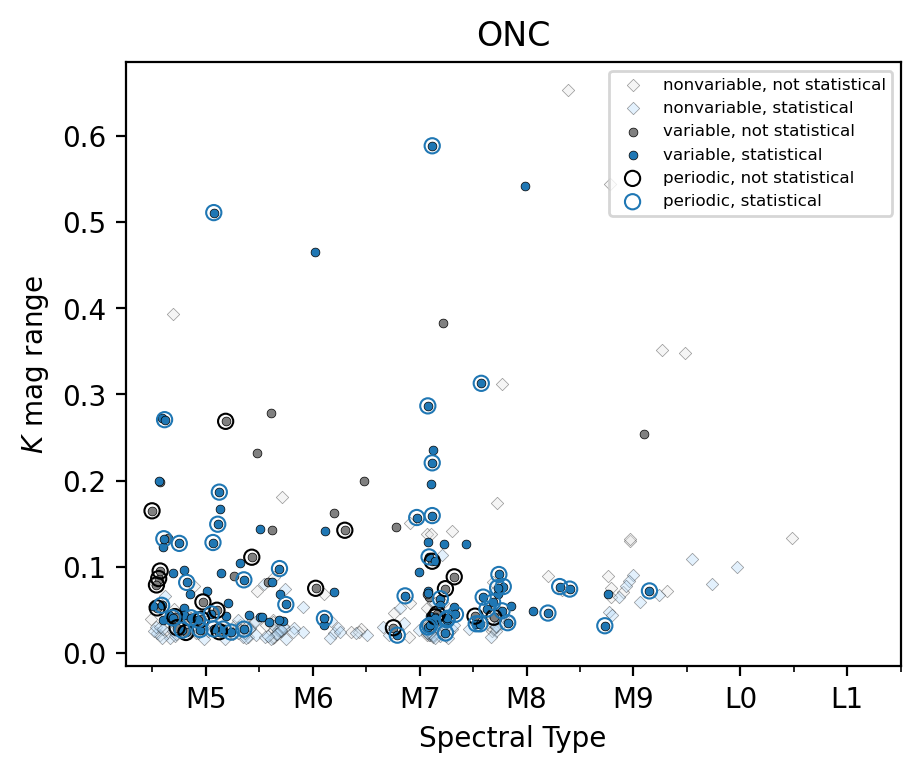

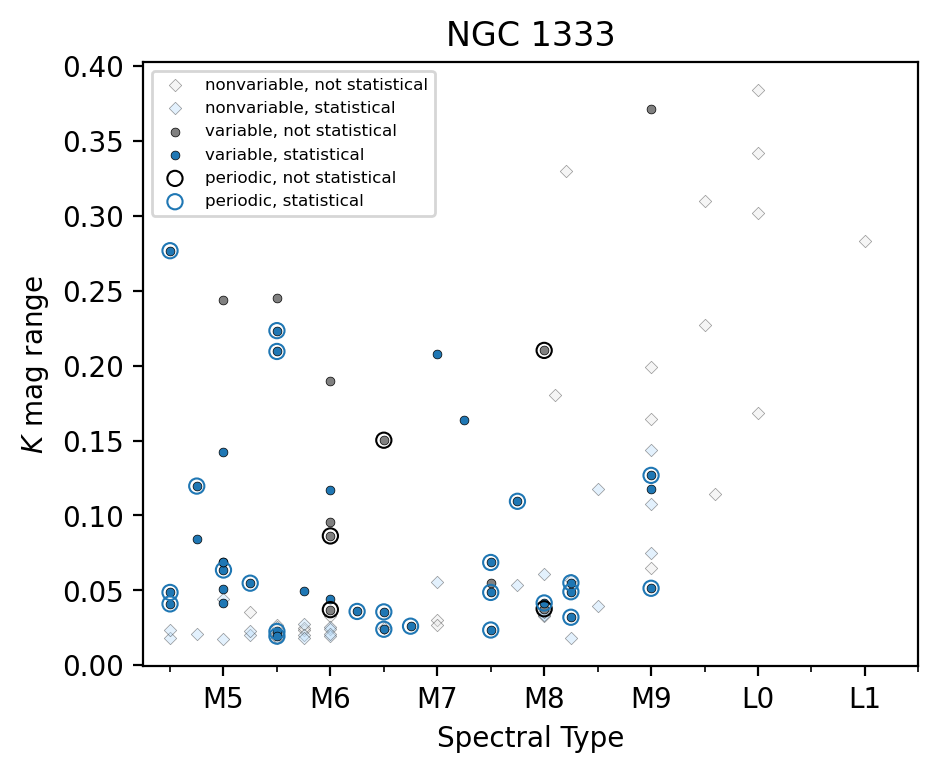

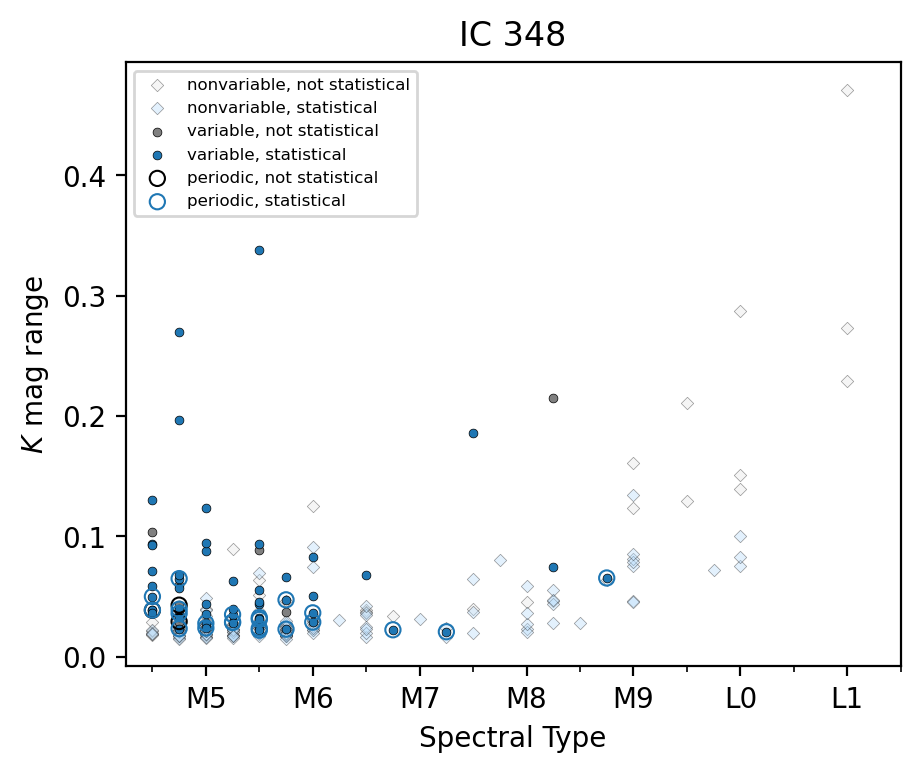

In [73]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['range_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['range_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['range_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['range_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['range_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['range_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("$K$ mag range")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [75]:
# TODO with more brain power:
# Figure out how to access the period sheet and its (period, amplitude) info such that we could readily plot 
# amplitude (and period!) vs spectral type.